- 딥러닝에서의 회귀
- 딥러닝은 회귀를 수행하는 작업이다.
- 따라서 회귀를 수행할 때는 분류와 크게 다르지 않다.
- 분류가 회귀를 통해 얻은 결과를 활성화 함수를 통해 0 ~ 1사이로 맞추고 그 결과를 통해 최종 결과를 도출하는 작업을 하게 된다.
- 분류에서는 마지막에 활성화 함수를 배치를 하고 회귀를 배치를 하지 않으면 된다.

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력 창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과데이터의 종류 수 만큼 결과데이터의 컬럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 더이상 성능 향상이 이루어지지 않는다면 조기 중단 시킬 수 있다.
from tensorflow.keras.callbacks import EarlyStopping

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# seed 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터를 읽어온다.
# 이 파일은 데이터가 띄어쓰기로 구분되어 있으므로
# delim_whitespace를 True로 설정한다.
df1 = pd.read_csv('data/housing.csv', delim_whitespace=True, header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# 결측치 확인
df1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop(13, axis=1)
y = df1[13]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [7]:
model = Sequential()

model.add(Dense(30, input_dim=13))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

# 회귀는 활성화 함수를 두지 않는다.
model.add(Dense(1))

In [8]:
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 모델들이 저장될 위치
# epoch : 학습 횟수
# val_loss : 검증 데이터의 손실률
path1 = 'models/22_선형회귀/{epoch}-{val_loss}.hdf5'
path2 = 'models/22_선형회귀/최종.hdf5'

# 저장 콜백 설정
# save_best_only : True를 넣어주면 모니터링하는 값이 개선 되었을 경우에만
# 저장을 한다. 기본은 False 이며 False시 매번 저장을 한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                       save_best_only=True)

call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', 
                       save_best_only=True)

In [10]:
# 조기 중단
# patience : 현재 평가 값이 이전 평가 값 보다 좋다고 판단될 경우 앞으로
# 몇번을 더 볼 것인가를 설정하는 부분
call3 = EarlyStopping(monitor='val_loss', patience=50)

In [11]:
# 테스트를 위해 학습과 검증으로 나눠서 한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=2000, batch_size=500, 
                    callbacks=[call1, call2, call3])

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 930.2162 - val_loss: 877.3423
Epoch 2/2000
1/1 [==============================] - 0s 18ms/step - loss: 826.0595 - val_loss: 791.7953
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 738.4684 - val_loss: 718.2267
Epoch 4/2000
1/1 [==============================] - 0s 18ms/step - loss: 664.1970 - val_loss: 652.2855
Epoch 5/2000
1/1 [==============================] - 0s 16ms/step - loss: 599.4406 - val_loss: 593.2211
Epoch 6/2000
1/1 [==============================] - 0s 17ms/step - loss: 542.0021 - val_loss: 538.0031
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 488.8558 - val_loss: 487.5325
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 440.2903 - val_loss: 441.2656
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 395.9294 - val_loss: 397.8363
Epoch 10/2000
1/1 [==============================] - 0s 18ms/step - loss: 3

Epoch 81/2000
1/1 [==============================] - 0s 18ms/step - loss: 62.0309 - val_loss: 72.5421
Epoch 82/2000
1/1 [==============================] - 0s 18ms/step - loss: 61.8588 - val_loss: 72.3909
Epoch 83/2000
1/1 [==============================] - 0s 16ms/step - loss: 61.7022 - val_loss: 72.2878
Epoch 84/2000
1/1 [==============================] - 0s 17ms/step - loss: 61.5723 - val_loss: 72.2040
Epoch 85/2000
1/1 [==============================] - 0s 17ms/step - loss: 61.3915 - val_loss: 72.0620
Epoch 86/2000
1/1 [==============================] - 0s 17ms/step - loss: 61.2527 - val_loss: 71.9907
Epoch 87/2000
1/1 [==============================] - 0s 17ms/step - loss: 61.1007 - val_loss: 71.8391
Epoch 88/2000
1/1 [==============================] - 0s 16ms/step - loss: 60.9473 - val_loss: 71.8054
Epoch 89/2000
1/1 [==============================] - 0s 17ms/step - loss: 60.7904 - val_loss: 71.6744
Epoch 90/2000
1/1 [==============================] - 0s 17ms/step - loss: 60.6252 

1/1 [==============================] - 0s 16ms/step - loss: 53.7969 - val_loss: 67.2215
Epoch 161/2000
1/1 [==============================] - 0s 16ms/step - loss: 53.7361 - val_loss: 67.1738
Epoch 162/2000
1/1 [==============================] - 0s 18ms/step - loss: 53.6756 - val_loss: 67.1246
Epoch 163/2000
1/1 [==============================] - 0s 17ms/step - loss: 53.6144 - val_loss: 67.1177
Epoch 164/2000
1/1 [==============================] - 0s 18ms/step - loss: 53.5491 - val_loss: 67.0602
Epoch 165/2000
1/1 [==============================] - 0s 17ms/step - loss: 53.4795 - val_loss: 66.9825
Epoch 166/2000
1/1 [==============================] - 0s 17ms/step - loss: 53.4190 - val_loss: 66.8988
Epoch 167/2000
1/1 [==============================] - 0s 16ms/step - loss: 53.3576 - val_loss: 66.7863
Epoch 168/2000
1/1 [==============================] - 0s 16ms/step - loss: 53.2993 - val_loss: 66.7371
Epoch 169/2000
1/1 [==============================] - 0s 17ms/step - loss: 53.2443 - val

1/1 [==============================] - 0s 18ms/step - loss: 49.2456 - val_loss: 62.3150
Epoch 240/2000
1/1 [==============================] - 0s 17ms/step - loss: 49.1856 - val_loss: 62.2054
Epoch 241/2000
1/1 [==============================] - 0s 16ms/step - loss: 49.1433 - val_loss: 62.1326
Epoch 242/2000
1/1 [==============================] - 0s 18ms/step - loss: 49.0802 - val_loss: 62.0890
Epoch 243/2000
1/1 [==============================] - 0s 18ms/step - loss: 49.0324 - val_loss: 62.0289
Epoch 244/2000
1/1 [==============================] - 0s 17ms/step - loss: 48.9772 - val_loss: 61.9293
Epoch 245/2000
1/1 [==============================] - 0s 16ms/step - loss: 48.9265 - val_loss: 61.9022
Epoch 246/2000
1/1 [==============================] - 0s 17ms/step - loss: 48.8779 - val_loss: 61.8393
Epoch 247/2000
1/1 [==============================] - 0s 17ms/step - loss: 48.8265 - val_loss: 61.7836
Epoch 248/2000
1/1 [==============================] - 0s 17ms/step - loss: 48.7787 - val

1/1 [==============================] - 0s 18ms/step - loss: 45.0919 - val_loss: 57.0725
Epoch 319/2000
1/1 [==============================] - 0s 16ms/step - loss: 45.0311 - val_loss: 57.0102
Epoch 320/2000
1/1 [==============================] - 0s 16ms/step - loss: 44.9702 - val_loss: 56.8968
Epoch 321/2000
1/1 [==============================] - 0s 16ms/step - loss: 44.9167 - val_loss: 56.7912
Epoch 322/2000
1/1 [==============================] - 0s 18ms/step - loss: 44.8771 - val_loss: 56.7491
Epoch 323/2000
1/1 [==============================] - 0s 16ms/step - loss: 44.8189 - val_loss: 56.7278
Epoch 324/2000
1/1 [==============================] - 0s 17ms/step - loss: 44.7650 - val_loss: 56.6572
Epoch 325/2000
1/1 [==============================] - 0s 18ms/step - loss: 44.7262 - val_loss: 56.6156
Epoch 326/2000
1/1 [==============================] - 0s 16ms/step - loss: 44.6740 - val_loss: 56.5218
Epoch 327/2000
1/1 [==============================] - 0s 17ms/step - loss: 44.6151 - val

1/1 [==============================] - 0s 17ms/step - loss: 40.8158 - val_loss: 51.7344
Epoch 398/2000
1/1 [==============================] - 0s 17ms/step - loss: 40.7642 - val_loss: 51.6687
Epoch 399/2000
1/1 [==============================] - 0s 18ms/step - loss: 40.7281 - val_loss: 51.6247
Epoch 400/2000
1/1 [==============================] - 0s 16ms/step - loss: 40.6665 - val_loss: 51.5162
Epoch 401/2000
1/1 [==============================] - 0s 18ms/step - loss: 40.6100 - val_loss: 51.4486
Epoch 402/2000
1/1 [==============================] - 0s 18ms/step - loss: 40.5440 - val_loss: 51.4169
Epoch 403/2000
1/1 [==============================] - 0s 17ms/step - loss: 40.4803 - val_loss: 51.2645
Epoch 404/2000
1/1 [==============================] - 0s 18ms/step - loss: 40.4438 - val_loss: 51.1922
Epoch 405/2000
1/1 [==============================] - 0s 17ms/step - loss: 40.3958 - val_loss: 51.1158
Epoch 406/2000
1/1 [==============================] - 0s 17ms/step - loss: 40.3340 - val

1/1 [==============================] - 0s 17ms/step - loss: 36.3179 - val_loss: 45.7759
Epoch 477/2000
1/1 [==============================] - 0s 17ms/step - loss: 36.2589 - val_loss: 45.7234
Epoch 478/2000
1/1 [==============================] - 0s 17ms/step - loss: 36.1923 - val_loss: 45.5502
Epoch 479/2000
1/1 [==============================] - 0s 17ms/step - loss: 36.1383 - val_loss: 45.5133
Epoch 480/2000
1/1 [==============================] - 0s 16ms/step - loss: 36.0729 - val_loss: 45.4775
Epoch 481/2000
1/1 [==============================] - 0s 17ms/step - loss: 36.0122 - val_loss: 45.3998
Epoch 482/2000
1/1 [==============================] - 0s 17ms/step - loss: 35.9569 - val_loss: 45.2738
Epoch 483/2000
1/1 [==============================] - 0s 16ms/step - loss: 35.8874 - val_loss: 45.0823
Epoch 484/2000
1/1 [==============================] - 0s 18ms/step - loss: 35.8203 - val_loss: 44.9858
Epoch 485/2000
1/1 [==============================] - 0s 16ms/step - loss: 35.7804 - val

1/1 [==============================] - 0s 17ms/step - loss: 30.3119 - val_loss: 37.6051
Epoch 556/2000
1/1 [==============================] - 0s 17ms/step - loss: 30.2337 - val_loss: 37.5217
Epoch 557/2000
1/1 [==============================] - 0s 16ms/step - loss: 30.1605 - val_loss: 37.3551
Epoch 558/2000
1/1 [==============================] - 0s 17ms/step - loss: 30.0931 - val_loss: 37.2109
Epoch 559/2000
1/1 [==============================] - 0s 17ms/step - loss: 30.0159 - val_loss: 37.1936
Epoch 560/2000
1/1 [==============================] - 0s 18ms/step - loss: 29.9503 - val_loss: 37.0859
Epoch 561/2000
1/1 [==============================] - 0s 18ms/step - loss: 29.8901 - val_loss: 36.9287
Epoch 562/2000
1/1 [==============================] - 0s 17ms/step - loss: 29.7953 - val_loss: 36.8073
Epoch 563/2000
1/1 [==============================] - 0s 17ms/step - loss: 29.7436 - val_loss: 36.7760
Epoch 564/2000
1/1 [==============================] - 0s 19ms/step - loss: 29.6581 - val

1/1 [==============================] - 0s 16ms/step - loss: 25.0962 - val_loss: 30.7177
Epoch 635/2000
1/1 [==============================] - 0s 17ms/step - loss: 25.0453 - val_loss: 30.5519
Epoch 636/2000
1/1 [==============================] - 0s 17ms/step - loss: 24.9992 - val_loss: 30.5013
Epoch 637/2000
1/1 [==============================] - 0s 18ms/step - loss: 24.9467 - val_loss: 30.4801
Epoch 638/2000
1/1 [==============================] - 0s 17ms/step - loss: 24.9216 - val_loss: 30.4138
Epoch 639/2000
1/1 [==============================] - 0s 18ms/step - loss: 24.8676 - val_loss: 30.3510
Epoch 640/2000
1/1 [==============================] - 0s 16ms/step - loss: 24.8091 - val_loss: 30.2528
Epoch 641/2000
1/1 [==============================] - 0s 17ms/step - loss: 24.7598 - val_loss: 30.1962
Epoch 642/2000
1/1 [==============================] - 0s 16ms/step - loss: 24.6835 - val_loss: 30.0657
Epoch 643/2000
1/1 [==============================] - 0s 21ms/step - loss: 24.6185 - val

1/1 [==============================] - 0s 16ms/step - loss: 21.9053 - val_loss: 26.0978
Epoch 714/2000
1/1 [==============================] - 0s 16ms/step - loss: 21.9007 - val_loss: 25.9826
Epoch 715/2000
1/1 [==============================] - 0s 16ms/step - loss: 21.8415 - val_loss: 25.9425
Epoch 716/2000
1/1 [==============================] - 0s 17ms/step - loss: 21.8274 - val_loss: 25.8758
Epoch 717/2000
1/1 [==============================] - 0s 16ms/step - loss: 21.7870 - val_loss: 25.8316
Epoch 718/2000
1/1 [==============================] - 0s 17ms/step - loss: 21.7670 - val_loss: 25.8139
Epoch 719/2000
1/1 [==============================] - 0s 16ms/step - loss: 21.7337 - val_loss: 25.7636
Epoch 720/2000
1/1 [==============================] - 0s 16ms/step - loss: 21.7236 - val_loss: 25.7089
Epoch 721/2000
1/1 [==============================] - 0s 18ms/step - loss: 21.6818 - val_loss: 25.7020
Epoch 722/2000
1/1 [==============================] - 0s 17ms/step - loss: 21.6411 - val

1/1 [==============================] - 0s 17ms/step - loss: 20.0137 - val_loss: 23.3025
Epoch 793/2000
1/1 [==============================] - 0s 17ms/step - loss: 19.9948 - val_loss: 23.2876
Epoch 794/2000
1/1 [==============================] - 0s 18ms/step - loss: 19.9786 - val_loss: 23.2686
Epoch 795/2000
1/1 [==============================] - 0s 16ms/step - loss: 19.9595 - val_loss: 23.2498
Epoch 796/2000
1/1 [==============================] - 0s 17ms/step - loss: 19.9527 - val_loss: 23.2345
Epoch 797/2000
1/1 [==============================] - 0s 16ms/step - loss: 19.9479 - val_loss: 23.1917
Epoch 798/2000
1/1 [==============================] - 0s 16ms/step - loss: 19.9005 - val_loss: 23.2401
Epoch 799/2000
1/1 [==============================] - 0s 17ms/step - loss: 19.9178 - val_loss: 23.1528
Epoch 800/2000
1/1 [==============================] - 0s 19ms/step - loss: 19.8862 - val_loss: 23.1327
Epoch 801/2000
1/1 [==============================] - 0s 15ms/step - loss: 19.8941 - val

1/1 [==============================] - 0s 18ms/step - loss: 19.0944 - val_loss: 21.9779
Epoch 872/2000
1/1 [==============================] - 0s 15ms/step - loss: 18.9936 - val_loss: 22.0071
Epoch 873/2000
1/1 [==============================] - 0s 17ms/step - loss: 18.9870 - val_loss: 21.9095
Epoch 874/2000
1/1 [==============================] - 0s 18ms/step - loss: 18.9954 - val_loss: 21.9385
Epoch 875/2000
1/1 [==============================] - 0s 16ms/step - loss: 18.9845 - val_loss: 21.9296
Epoch 876/2000
1/1 [==============================] - 0s 16ms/step - loss: 18.9178 - val_loss: 21.9943
Epoch 877/2000
1/1 [==============================] - 0s 16ms/step - loss: 18.9735 - val_loss: 21.8652
Epoch 878/2000
1/1 [==============================] - 0s 17ms/step - loss: 18.8965 - val_loss: 21.8307
Epoch 879/2000
1/1 [==============================] - 0s 18ms/step - loss: 18.9366 - val_loss: 21.8052
Epoch 880/2000
1/1 [==============================] - 0s 22ms/step - loss: 18.8625 - val

1/1 [==============================] - 0s 19ms/step - loss: 18.0401 - val_loss: 21.1160
Epoch 951/2000
1/1 [==============================] - 0s 16ms/step - loss: 18.1383 - val_loss: 20.9684
Epoch 952/2000
1/1 [==============================] - 0s 17ms/step - loss: 18.0364 - val_loss: 20.9200
Epoch 953/2000
1/1 [==============================] - 0s 18ms/step - loss: 18.0453 - val_loss: 20.9727
Epoch 954/2000
1/1 [==============================] - 0s 16ms/step - loss: 18.0139 - val_loss: 21.0361
Epoch 955/2000
1/1 [==============================] - 0s 17ms/step - loss: 18.0140 - val_loss: 20.8801
Epoch 956/2000
1/1 [==============================] - 0s 17ms/step - loss: 17.9828 - val_loss: 20.8607
Epoch 957/2000
1/1 [==============================] - 0s 18ms/step - loss: 17.9860 - val_loss: 20.9281
Epoch 958/2000
1/1 [==============================] - 0s 16ms/step - loss: 17.9552 - val_loss: 20.9134
Epoch 959/2000
1/1 [==============================] - 0s 15ms/step - loss: 17.9444 - val

1/1 [==============================] - 0s 16ms/step - loss: 17.1656 - val_loss: 20.2745
Epoch 1030/2000
1/1 [==============================] - 0s 18ms/step - loss: 17.1508 - val_loss: 20.2632
Epoch 1031/2000
1/1 [==============================] - 0s 17ms/step - loss: 17.1331 - val_loss: 20.2575
Epoch 1032/2000
1/1 [==============================] - 0s 18ms/step - loss: 17.1082 - val_loss: 20.2149
Epoch 1033/2000
1/1 [==============================] - 0s 17ms/step - loss: 17.0898 - val_loss: 20.3045
Epoch 1034/2000
1/1 [==============================] - 0s 18ms/step - loss: 17.0994 - val_loss: 20.3082
Epoch 1035/2000
1/1 [==============================] - 0s 16ms/step - loss: 17.0960 - val_loss: 20.2436
Epoch 1036/2000
1/1 [==============================] - 0s 16ms/step - loss: 17.0605 - val_loss: 20.2231
Epoch 1037/2000
1/1 [==============================] - 0s 16ms/step - loss: 17.0436 - val_loss: 20.1651
Epoch 1038/2000
1/1 [==============================] - 0s 16ms/step - loss: 17.0

Epoch 1108/2000
1/1 [==============================] - 0s 17ms/step - loss: 16.1555 - val_loss: 19.7208
Epoch 1109/2000
1/1 [==============================] - 0s 20ms/step - loss: 16.0466 - val_loss: 19.7217
Epoch 1110/2000
1/1 [==============================] - 0s 17ms/step - loss: 16.0897 - val_loss: 19.7095
Epoch 1111/2000
1/1 [==============================] - 0s 17ms/step - loss: 16.0523 - val_loss: 19.7459
Epoch 1112/2000
1/1 [==============================] - 0s 17ms/step - loss: 16.0691 - val_loss: 19.6988
Epoch 1113/2000
1/1 [==============================] - 0s 18ms/step - loss: 16.0072 - val_loss: 19.6715
Epoch 1114/2000
1/1 [==============================] - 0s 16ms/step - loss: 15.9935 - val_loss: 19.6775
Epoch 1115/2000
1/1 [==============================] - 0s 15ms/step - loss: 16.0340 - val_loss: 19.6585
Epoch 1116/2000
1/1 [==============================] - 0s 17ms/step - loss: 15.9957 - val_loss: 19.6569
Epoch 1117/2000
1/1 [==============================] - 0s 16ms/s

Epoch 1187/2000
1/1 [==============================] - 0s 18ms/step - loss: 15.2578 - val_loss: 19.0998
Epoch 1188/2000
1/1 [==============================] - 0s 17ms/step - loss: 15.2751 - val_loss: 19.0879
Epoch 1189/2000
1/1 [==============================] - 0s 17ms/step - loss: 15.2703 - val_loss: 19.1071
Epoch 1190/2000
1/1 [==============================] - 0s 15ms/step - loss: 15.2737 - val_loss: 19.1133
Epoch 1191/2000
1/1 [==============================] - 0s 16ms/step - loss: 15.2640 - val_loss: 19.1008
Epoch 1192/2000
1/1 [==============================] - 0s 16ms/step - loss: 15.2414 - val_loss: 19.0581
Epoch 1193/2000
1/1 [==============================] - 0s 17ms/step - loss: 15.2573 - val_loss: 19.0763
Epoch 1194/2000
1/1 [==============================] - 0s 17ms/step - loss: 15.2609 - val_loss: 19.0380
Epoch 1195/2000
1/1 [==============================] - 0s 18ms/step - loss: 15.2779 - val_loss: 18.9895
Epoch 1196/2000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 17ms/step - loss: 14.8271 - val_loss: 18.5173
Epoch 1266/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.8241 - val_loss: 18.5444
Epoch 1267/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.8313 - val_loss: 18.4938
Epoch 1268/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.7959 - val_loss: 18.4786
Epoch 1269/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.8021 - val_loss: 18.4815
Epoch 1270/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.7821 - val_loss: 18.4960
Epoch 1271/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.7920 - val_loss: 18.4472
Epoch 1272/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.7726 - val_loss: 18.4910
Epoch 1273/2000
1/1 [==============================] - 0s 19ms/step - loss: 14.8228 - val_loss: 18.4530
Epoch 1274/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.7

Epoch 1344/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.4958 - val_loss: 18.1430
Epoch 1345/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.5077 - val_loss: 18.0563
Epoch 1346/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.5034 - val_loss: 18.0965
Epoch 1347/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.4997 - val_loss: 18.0765
Epoch 1348/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.4779 - val_loss: 18.0928
Epoch 1349/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.4804 - val_loss: 18.0946
Epoch 1350/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.4796 - val_loss: 18.0523
Epoch 1351/2000
1/1 [==============================] - 0s 18ms/step - loss: 14.4624 - val_loss: 18.0092
Epoch 1352/2000
1/1 [==============================] - 0s 18ms/step - loss: 14.4466 - val_loss: 18.0204
Epoch 1353/2000
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 16ms/step - loss: 14.2060 - val_loss: 17.8570
Epoch 1423/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.2096 - val_loss: 17.8402
Epoch 1424/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.1602 - val_loss: 17.7769
Epoch 1425/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.1743 - val_loss: 17.7512
Epoch 1426/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.1711 - val_loss: 17.7343
Epoch 1427/2000
1/1 [==============================] - 0s 18ms/step - loss: 14.2218 - val_loss: 17.7545
Epoch 1428/2000
1/1 [==============================] - 0s 16ms/step - loss: 14.1680 - val_loss: 17.7385
Epoch 1429/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.1998 - val_loss: 17.7572
Epoch 1430/2000
1/1 [==============================] - 0s 15ms/step - loss: 14.1532 - val_loss: 17.7259
Epoch 1431/2000
1/1 [==============================] - 0s 17ms/step - loss: 14.1

Epoch 1501/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.9047 - val_loss: 17.4112
Epoch 1502/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.9277 - val_loss: 17.3769
Epoch 1503/2000
1/1 [==============================] - 0s 19ms/step - loss: 13.9376 - val_loss: 17.3885
Epoch 1504/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.8967 - val_loss: 17.4233
Epoch 1505/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.9204 - val_loss: 17.4314
Epoch 1506/2000
1/1 [==============================] - 0s 25ms/step - loss: 13.9396 - val_loss: 17.4226
Epoch 1507/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.9164 - val_loss: 17.4498
Epoch 1508/2000
1/1 [==============================] - 0s 19ms/step - loss: 13.8897 - val_loss: 17.4159
Epoch 1509/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.9153 - val_loss: 17.4469
Epoch 1510/2000
1/1 [==============================] - 0s 15ms/s

Epoch 1580/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.7421 - val_loss: 17.2684
Epoch 1581/2000
1/1 [==============================] - 0s 15ms/step - loss: 13.7693 - val_loss: 17.4067
Epoch 1582/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.8257 - val_loss: 17.2796
Epoch 1583/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.6697 - val_loss: 17.3912
Epoch 1584/2000
1/1 [==============================] - 0s 15ms/step - loss: 13.8601 - val_loss: 17.2349
Epoch 1585/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.6417 - val_loss: 17.4561
Epoch 1586/2000
1/1 [==============================] - 0s 23ms/step - loss: 13.7960 - val_loss: 17.2891
Epoch 1587/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.6962 - val_loss: 17.2442
Epoch 1588/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.6668 - val_loss: 17.4106
Epoch 1589/2000
1/1 [==============================] - 0s 15ms/s

Epoch 1659/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.4626 - val_loss: 17.1014
Epoch 1660/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.4516 - val_loss: 17.0823
Epoch 1661/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.4418 - val_loss: 17.0907
Epoch 1662/2000
1/1 [==============================] - 0s 15ms/step - loss: 13.4282 - val_loss: 17.0895
Epoch 1663/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.4557 - val_loss: 17.0985
Epoch 1664/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.4294 - val_loss: 17.0377
Epoch 1665/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.4111 - val_loss: 17.0594
Epoch 1666/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.4044 - val_loss: 17.0284
Epoch 1667/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.4183 - val_loss: 17.0791
Epoch 1668/2000
1/1 [==============================] - 0s 17ms/s

Epoch 1738/2000
1/1 [==============================] - 0s 23ms/step - loss: 13.2819 - val_loss: 16.9322
Epoch 1739/2000
1/1 [==============================] - 0s 19ms/step - loss: 13.2933 - val_loss: 16.8894
Epoch 1740/2000
1/1 [==============================] - 0s 21ms/step - loss: 13.2713 - val_loss: 16.8731
Epoch 1741/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.3066 - val_loss: 16.9157
Epoch 1742/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.2833 - val_loss: 16.8829
Epoch 1743/2000
1/1 [==============================] - 0s 15ms/step - loss: 13.2628 - val_loss: 16.8552
Epoch 1744/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.2513 - val_loss: 16.8690
Epoch 1745/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.2302 - val_loss: 16.9465
Epoch 1746/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.3030 - val_loss: 16.8478
Epoch 1747/2000
1/1 [==============================] - 0s 19ms/s

Epoch 1817/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.0960 - val_loss: 16.6789
Epoch 1818/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.0869 - val_loss: 16.6514
Epoch 1819/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.0977 - val_loss: 16.6815
Epoch 1820/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.0606 - val_loss: 16.6727
Epoch 1821/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.0703 - val_loss: 16.6812
Epoch 1822/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.0812 - val_loss: 16.7029
Epoch 1823/2000
1/1 [==============================] - 0s 16ms/step - loss: 13.0770 - val_loss: 16.7220
Epoch 1824/2000
1/1 [==============================] - 0s 17ms/step - loss: 13.0946 - val_loss: 16.7052
Epoch 1825/2000
1/1 [==============================] - 0s 18ms/step - loss: 13.0719 - val_loss: 16.6677
Epoch 1826/2000
1/1 [==============================] - 0s 17ms/s

Epoch 1896/2000
1/1 [==============================] - 0s 19ms/step - loss: 12.9613 - val_loss: 16.4611
Epoch 1897/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.8783 - val_loss: 16.4684
Epoch 1898/2000
1/1 [==============================] - 0s 16ms/step - loss: 12.9375 - val_loss: 16.5893
Epoch 1899/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.9424 - val_loss: 16.5715
Epoch 1900/2000
1/1 [==============================] - 0s 18ms/step - loss: 12.9008 - val_loss: 16.5386
Epoch 1901/2000
1/1 [==============================] - 0s 16ms/step - loss: 12.9114 - val_loss: 16.4491
Epoch 1902/2000
1/1 [==============================] - 0s 19ms/step - loss: 12.9020 - val_loss: 16.5506
Epoch 1903/2000
1/1 [==============================] - ETA: 0s - loss: 12.97 - 0s 18ms/step - loss: 12.9784 - val_loss: 16.4306
Epoch 1904/2000
1/1 [==============================] - 0s 19ms/step - loss: 12.9159 - val_loss: 16.4061
Epoch 1905/2000
1/1 [===================

1/1 [==============================] - 0s 16ms/step - loss: 12.7471 - val_loss: 16.2959
Epoch 1975/2000
1/1 [==============================] - 0s 19ms/step - loss: 12.7353 - val_loss: 16.3582
Epoch 1976/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.7573 - val_loss: 16.2994
Epoch 1977/2000
1/1 [==============================] - 0s 16ms/step - loss: 12.7152 - val_loss: 16.3395
Epoch 1978/2000
1/1 [==============================] - 0s 18ms/step - loss: 12.7083 - val_loss: 16.4983
Epoch 1979/2000
1/1 [==============================] - 0s 18ms/step - loss: 12.7959 - val_loss: 16.3775
Epoch 1980/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.7528 - val_loss: 16.3293
Epoch 1981/2000
1/1 [==============================] - 0s 18ms/step - loss: 12.6967 - val_loss: 16.3800
Epoch 1982/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.7207 - val_loss: 16.2831
Epoch 1983/2000
1/1 [==============================] - 0s 19ms/step - loss: 12.6

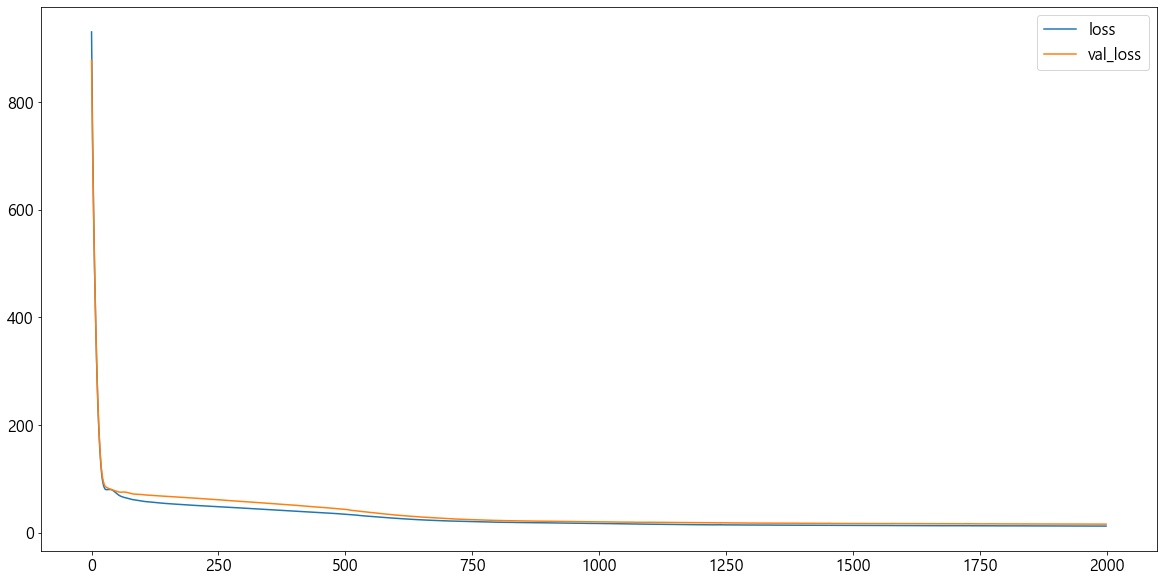

In [12]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [13]:
# 성능평가
a1 = model.evaluate(X_test, y_test)
print(f'손실률 : {a1}')

5/5 [==============================] - 0s 2ms/step - loss: 16.2639
손실률 : 16.2639217376709


In [15]:
# 모델을 복원한다.
best_model = load_model('models/22_선형회귀/최종.hdf5')
best_model

In [20]:
# 결과를 예측
pred1 = best_model.predict(X_test).flatten()
pred1

array([31.691868 , 29.1035   , 19.149124 , 23.474897 , 24.747076 ,
       18.748978 , 29.975866 , 18.129461 , 21.424498 , 23.164734 ,
       30.005682 , 30.685875 , 17.40433  , 23.117313 , 21.512554 ,
       25.67001  , 12.804648 , 37.079247 , 28.040628 , 16.88409  ,
       21.38309  , 13.78387  , 22.49964  , 23.577705 , 31.135145 ,
       11.704777 , 11.796269 , 20.519335 , 36.202465 , 14.762757 ,
       19.710518 , 17.37924  , 47.919865 , 15.920772 , 15.337752 ,
       19.3997   , 16.640562 , 32.99471  , 11.11016  , 16.494686 ,
       20.12177  , 22.238659 , 26.562418 , 14.615733 , 15.407184 ,
       11.753483 , 52.456486 , 15.078021 , 15.614341 , 12.219623 ,
       24.188372 , 20.301397 , 29.656452 , 17.422468 , 15.142171 ,
       22.118887 , 11.159282 , 28.02412  , 18.670504 , 36.534935 ,
       20.43214  , 25.94847  , 15.300746 , 13.393136 , 15.745534 ,
       44.299564 , 39.25745  , 21.143742 , 23.247753 , 28.52164  ,
       23.574497 ,  9.372737 , 19.351204 , 19.397837 , 18.4826

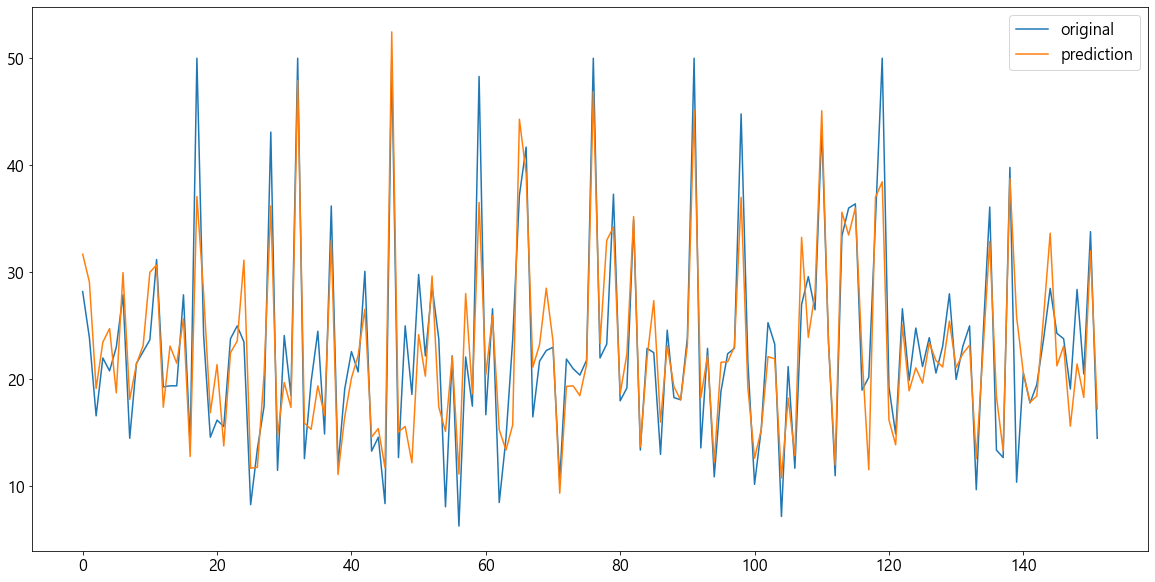

In [23]:
plt.plot(y_test.values, label='original')
plt.plot(pred1, label='prediction')
plt.legend()
plt.show()